In [1]:
import torch 
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

print(f"PyTorch Version: {torch.__version__}\ntorchvision version : {torchvision.__version__}")

PyTorch Version: 2.7.0+cu128
torchvision version : 0.22.0+cu128


In [2]:
train_data = torchvision.datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, #Get the training data
    download=True, #Download if does not exist in the disk
    transform=ToTensor(), #Images comes as PIL format. We want to turn into PyTorch Tensors.
    target_transform=None)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    )

In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape # [color_chanels=1, height=28, width=28]

torch.Size([1, 28, 28])

In [5]:
len(train_data.data), len(train_data.targets) ,len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])
Dataset classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Class: Ankle boot


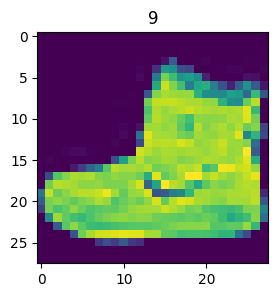

In [7]:
plt.figure(figsize=(3,3))

image, label = train_data[0] #Get the first element of training data
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) #squeeze() method remove dimension with size 1
                            #In our case, (1,28,28) -> (28,28)
plt.title(label)

#get classes ["coat]
print(f"Dataset classes: {train_data.classes}")
print(f"Class: {train_data.classes[label]}") 

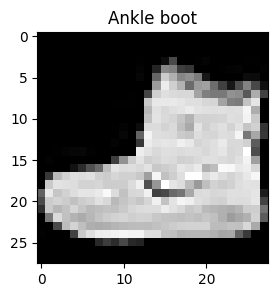

In [8]:
plt.figure(figsize=(3,3))

image, label = train_data[0]

plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.show()

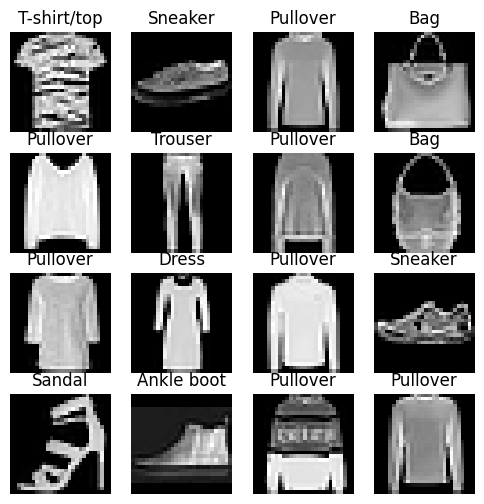

In [9]:
torch.manual_seed(57) #To get same data, we set seed to 57

fig = plt.figure(figsize=(6,6))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False) #No numbers in axises
    
plt.show()

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 256

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE
)

print(f"DataLoaders :\n {train_dataloader} \n {test_dataloader}\n")
print(f"Length of train dataloader: \n{len(train_dataloader)} \n{len(test_dataloader)}")


DataLoaders :

Length of train dataloader: 
235 
40


In [11]:
# Get the first batch from the DataLoader (features and labels)
# train_features_batch → the input images in one batch
# train_labels_batch → the target labels in that batch

train_features_batch, train_labels_batch = next(iter(train_dataloader)) #T
train_features_batch.shape, train_labels_batch.shape

(torch.Size([256, 1, 28, 28]), torch.Size([256]))

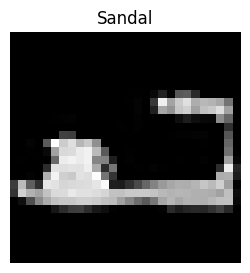

Label: 5 
 CLass: Sandal


In [12]:
torch.manual_seed(57)
class_names = train_data.classes

random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]

plt.figure(figsize=(3,3))
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

print(f"Label: {label} \n CLass: {class_names[label]}")

In [13]:
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)   

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_chanels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_chanels, height*width]


In [14]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features= hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
            )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [15]:
INPUT_SHAPE = 28 * 28
HIDDEN_UNITS = 10
OUTPUT_SHAPE = len(class_names)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = FashionMNISTModelV0(input_shape=INPUT_SHAPE, hidden_units= HIDDEN_UNITS, output_shape= OUTPUT_SHAPE).to("cpu")

In [16]:
import requests
from pathlib import Path

URL = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    request = requests.get(URL)
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [17]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() #or called "criterion"
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [18]:
from timeit import default_timer as timer
"""Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [19]:
#Dataset: The entire collection of data (e.g., 60,000 images).

#Epoch: One full pass through the entire dataset. If you set epochs=5, the model sees all data 5 times.

#Batch Size: Number of samples the model processes before updating weights. 
# For example, with batch size 256, the dataset is split into about 235 batches (60000/256 ≈ 235).


from tqdm import tqdm # Import tqdm for progress bar

torch.manual_seed(57)
train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch} \n----------")

    train_loss = 0
    for batch_idx, (X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred, y) #Batch loss
        train_loss += loss 

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Looked at {batch_idx * len(X)} / {len(train_dataloader.dataset)}")

    train_loss /=  len(train_dataloader)



    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                        end=train_time_end_on_cpu,
                                        device=str(next(model_0.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 20%|██        | 1/5 [00:06<00:24,  6.03s/it]


Train loss: 0.86101 | Test loss: 0.63971, Test acc: 77.50%

Epoch : 1 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 40%|████      | 2/5 [00:11<00:16,  5.44s/it]


Train loss: 0.56443 | Test loss: 0.56398, Test acc: 79.89%

Epoch : 2 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 60%|██████    | 3/5 [00:15<00:10,  5.10s/it]


Train loss: 0.51571 | Test loss: 0.53959, Test acc: 81.13%

Epoch : 3 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 80%|████████  | 4/5 [00:20<00:04,  4.92s/it]


Train loss: 0.49032 | Test loss: 0.78439, Test acc: 74.23%

Epoch : 4 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


100%|██████████| 5/5 [00:25<00:00,  5.03s/it]


Train loss: 0.47610 | Test loss: 0.53245, Test acc: 80.91%

Train time on cpu: 25.173 seconds


In [20]:
torch.manual_seed(57)
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn
               ):
    
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            y_pred = model(X)
            
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))# For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model name" : model.__class__.__name__,
             "model_loss" : loss.item(),
            "model_acc": acc}


model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn=accuracy_fn
    )

model_0_results

{'model name': 'FashionMNISTModelV0',
 'model_loss': 0.5324525237083435,
 'model_acc': 80.908203125}

In [21]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            #nn.ReLU()
        )

    def forward(self, X:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [22]:
torch.manual_seed(57)

model_1 = FashionMNISTModelV1(input_shape=INPUT_SHAPE, hidden_units=HIDDEN_UNITS, output_shape=OUTPUT_SHAPE).to(DEVICE)

next(model_1.parameters()).device   


device(type='cuda', index=0)

In [23]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [24]:
def train_step (
        model: nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device: torch.device = DEVICE):
    
    train_loss, train_acc = 0, 0
    model.to(DEVICE)

    #enumerate gives every batch a number
    for batch_idx, (X,y) in enumerate(data_loader): #DataLoader divides data into batch-sized parts
        X, y = X.to(DEVICE), y.to(DEVICE)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #argmax returns us predicted label
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train Loss: {train_loss:.5f}\tTrain Accuracy: {train_acc:.5f}")

In [25]:
def test_step(
        model : nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn,
        accuracy_fn,
        device: torch.device = DEVICE
        ):
    
    model = model.to(DEVICE)

    test_loss, test_acc = 0, 0

    for batch_index, (X,y) in enumerate(data_loader):
        X, y = X.to(DEVICE), y.to(DEVICE)

        y_pred = model(X)
        test_loss += loss_fn(y_pred, y)
        test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss: {test_loss:5f}\tTest Accuracy: {test_acc:.5f}")





In [26]:
torch.manual_seed(57)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n---------")

    train_step(
        model=model_1,
        data_loader=train_dataloader,
        loss_fn= loss_fn,
        optimizer= optimizer,
        accuracy_fn=accuracy_fn
    )

    test_step(
        model=model_1,
        data_loader=test_dataloader,
        loss_fn= loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=DEVICE)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
---------
Train Loss: 0.97782	Train Accuracy: 66.25720


 20%|██        | 1/5 [00:05<00:21,  5.34s/it]

Test Loss: 0.703307	Test Accuracy: 74.73633
Epoch 1
---------
Train Loss: 0.60034	Train Accuracy: 78.95833


 40%|████      | 2/5 [00:10<00:14,  4.97s/it]

Test Loss: 0.597579	Test Accuracy: 78.54492
Epoch 2
---------
Train Loss: 0.53166	Train Accuracy: 81.39295


 60%|██████    | 3/5 [00:14<00:09,  4.87s/it]

Test Loss: 0.545360	Test Accuracy: 80.55664
Epoch 3
---------
Train Loss: 0.49687	Train Accuracy: 82.48338


 80%|████████  | 4/5 [00:20<00:05,  5.03s/it]

Test Loss: 0.819879	Test Accuracy: 72.63672
Epoch 4
---------
Train Loss: 0.47649	Train Accuracy: 83.32059


100%|██████████| 5/5 [00:25<00:00,  5.06s/it]

Test Loss: 0.536433	Test Accuracy: 80.78125
Train time on cuda: 25.292 seconds


In [27]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = DEVICE):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=DEVICE
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5364331603050232,
 'model_acc': 80.78125}

In [28]:
model_0_results

{'model name': 'FashionMNISTModelV0',
 'model_loss': 0.5324525237083435,
 'model_acc': 80.908203125}

In [29]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        #28-28
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        #14-14
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=output_shape, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        #7-7
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape)
        )


    def forward(self, X:torch.Tensor) -> torch.Tensor:
        X = self.block1(X)
        X = self.block2(X)
        X = self.classifier(X)
        return X


In [30]:
torch.manual_seed(57)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape = len(class_names)).to(DEVICE)
model_2

# Input: 1x28x28
# ↓ Conv (padding=1, stride=1) → 1x28x28
# ↓ Conv (padding=1) → 1x28x28
# ↓ MaxPool(2) → 1x14x14
# ↓ Conv (padding=1) → 1x14x14
# ↓ Conv (padding=1) → 1x14x14
# ↓ MaxPool(2) → 1x7x7
# ↓ Flatten → [batch_size, hidden_units * 7 * 7]
# ↓ Linear → output_shape (örneğin 10 sınıf için 10)

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [32]:
torch.manual_seed(57)
train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n----------")
    train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=DEVICE
    )
    test_step(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=DEVICE
    )

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    end=train_time_end_model_2,
    device=DEVICE
    )  

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss: 2.15531	Train Accuracy: 19.52405


 33%|███▎      | 1/3 [00:06<00:12,  6.28s/it]

Test Loss: 0.943569	Test Accuracy: 62.81250
Epoch: 1
----------
Train Loss: 0.73658	Train Accuracy: 73.10062


 67%|██████▋   | 2/3 [00:11<00:05,  5.92s/it]

Test Loss: 0.624306	Test Accuracy: 77.05078
Epoch: 2
----------
Train Loss: 0.51781	Train Accuracy: 81.15691


100%|██████████| 3/3 [00:16<00:00,  5.57s/it]

Test Loss: 0.491421	Test Accuracy: 81.79688
Train time on cuda: 16.712 seconds


In [33]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=DEVICE
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4914209842681885,
 'model_acc': 81.796875}

In [34]:
import pandas as pd

compare_df = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_df

,model name,model_loss,model_acc,model_name
0,FashionMNISTModelV0,0.532453,80.908203,NaN
1,NaN,0.536433,80.781250,FashionMNISTModelV1
2,NaN,0.491421,81.796875,FashionMNISTModelV2


In [35]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = DEVICE):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [36]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [37]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[2.7072e-05, 5.6495e-06, 2.4981e-06, 2.3772e-06, 1.3295e-05, 8.5720e-01,
         5.1234e-05, 3.7896e-03, 3.8359e-03, 1.3507e-01],
        [4.1607e-02, 7.8565e-01, 1.1054e-03, 9.4367e-02, 3.8683e-02, 9.0098e-05,
         3.7620e-02, 8.3290e-05, 3.5923e-04, 4.3744e-04]])

In [38]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 9, 4, 3, 0, 4, 7, 1])

In [39]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 9, 4, 3, 0, 4, 7, 1]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

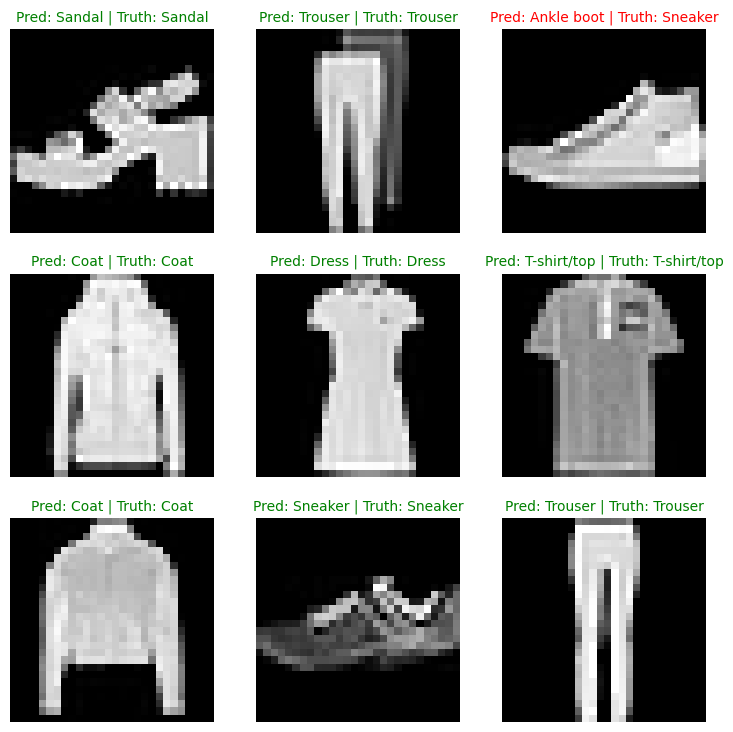

In [40]:
plt.figure(figsize=(9,9))
nrows, ncols = 3, 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    plt.axis(False)

    
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text,fontsize=10, c="r")

plt.axis(False)

In [41]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Predictions"):
        X, y = X.to(DEVICE), y.to(DEVICE)

        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)

c:\Users\enesy\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Making Predictions: 100%|██████████| 40/40 [00:00<00:00, 46.75it/s]


In [42]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version:  {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >=19, "mlxtend verison should be 0.19.0 or higher"
except:
    %pip install -q torchmetrics -U mlxtend

import torchmetrics, mlxtend
print(f"mlxtend version: {mlxtend.__version__}")  

mlxtend version:  0.23.4
mlxtend version: 0.23.4


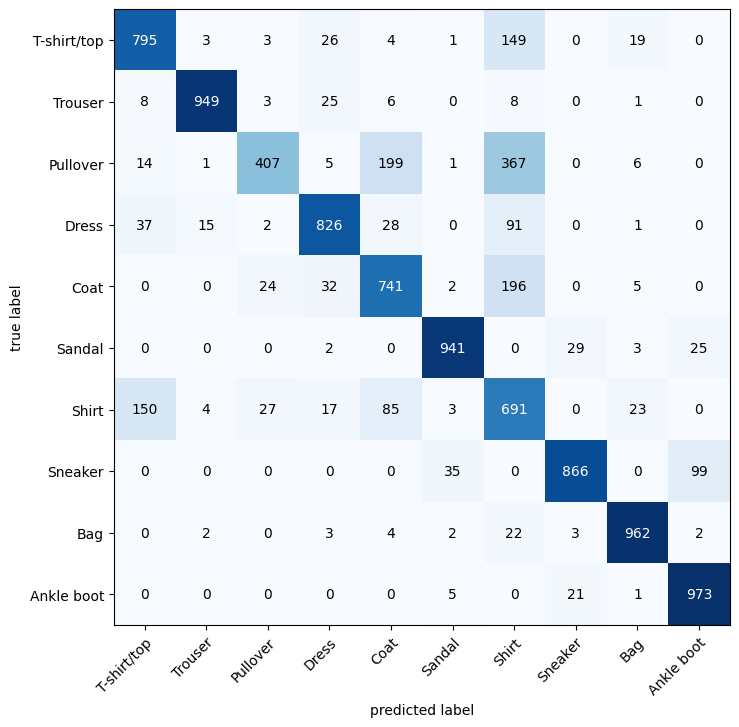

In [43]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


conf_mat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
conf_mat_tesnor = conf_mat(preds=y_preds_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat= conf_mat_tesnor.numpy(),
    class_names= class_names,
    figsize=(10,8)
)



In [44]:
y_test_preds = []

model_2.eval()
with torch.inference_mode():

    for X, y in tqdm(test_dataloader, desc="Predicting test dataset"):
        X, y = X.to(DEVICE), y.to(DEVICE)
        y_test_logits = model_2(X)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        y_test_preds.append(y_test_pred.cpu())

y_test_preds_tensor = torch.cat(y_test_preds)

Predicting test dataset: 100%|██████████| 40/40 [00:01<00:00, 36.76it/s]


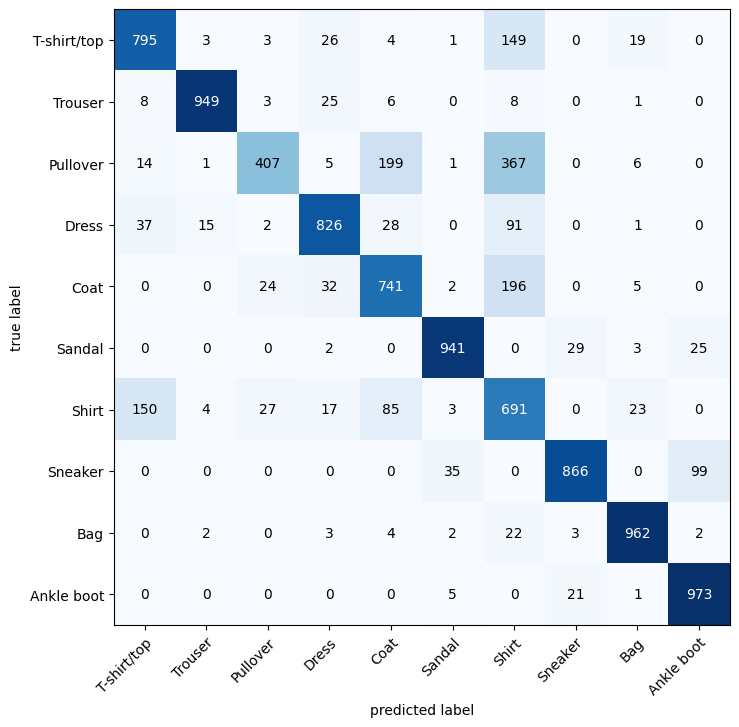

In [45]:
conf_mat = ConfusionMatrix(task="multiclass", num_classes= len(class_names))
conf_mat_tesnor = conf_mat(preds=y_test_preds_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tesnor.numpy(),
    class_names=class_names,
    figsize=(10,8)
)

In [46]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [47]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(DEVICE)

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [48]:
torch.manual_seed(57)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader=test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4914209842681885,
 'model_acc': 81.796875}

In [49]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4914209842681885,
 'model_acc': 81.796875}

In [50]:
torch.isclose(
    torch.tensor(model_2_results["model_loss"]),
    torch.tensor(loaded_model_2_results["model_loss"]),
    atol=1e-08,
    rtol=0.0001
)

tensor(True)